In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
tf1 = pd.read_csv('../TestResults/RandomBaseline01.csv')

In [10]:
tf1

,Algorithm,Baseline,originalTitle,originalCategory,Language_50,Reference_50,Religion_50,Science_50,Arts_50,Entertainment_50,...,Sports_50,Politics_50,Geography_50,Humanities_50,World_50,Education_50,Philosophy_50,Law_50,Events_50,Health_50
0,bloomfilter,RandomBaseline_test,Angelic tongues,Language_50,0.400000,0.200000,0.220000,0.280000,0.240000,0.340000,...,0.160000,0.300000,0.260000,0.200000,0.220000,0.220000,0.240000,0.120000,0.160000,0.240000
1,bloomfilter,RandomBaseline_test,Arendalsk,Language_50,0.040000,0.060000,0.080000,0.060000,0.020000,0.040000,...,0.020000,0.040000,0.060000,0.060000,0.060000,0.060000,0.040000,0.020000,0.000000,0.060000
2,bloomfilter,RandomBaseline_test,Authors' conference,Language_50,0.380000,0.280000,0.320000,0.300000,0.320000,0.380000,...,0.320000,0.280000,0.500000,0.300000,0.320000,0.320000,0.240000,0.240000,0.360000,0.320000
3,bloomfilter,RandomBaseline_test,Baenan language,Language_50,0.060000,0.000000,0.080000,0.060000,0.020000,0.040000,...,0.040000,0.040000,0.060000,0.080000,0.100000,0.060000,0.060000,0.020000,0.020000,0.040000
4,bloomfilter,RandomBaseline_test,Bahasa,Language_50,0.140000,0.080000,0.140000,0.100000,0.060000,0.100000,...,0.080000,0.100000,0.100000,0.120000,0.100000,0.100000,0.120000,0.060000,0.040000,0.100000
5,bloomfilter,RandomBaseline_test,Bangladeshi English,Language_50,0.420000,0.260000,0.320000,0.460000,0.440000,0.500000,...,0.420000,0.460000,0.460000,0.320000,0.460000,0.500000,0.380000,0.340000,0.480000,0.380000
6,bloomfilter,RandomBaseline_test,Coaxial power connector,Language_50,0.280000,0.340000,0.340000,0.240000,0.380000,0.320000,...,0.260000,0.300000,0.260000,0.120000,0.320000,0.260000,0.260000,0.200000,0.220000,0.260000
7,bloomfilter,RandomBaseline_test,Communication theory,Language_50,0.580000,0.560000,0.600000,0.540000,0.420000,0.500000,...,0.440000,0.400000,0.520000,0.500000,0.460000,0.520000,0.560000,0.280000,0.300000,0.500000
8,bloomfilter,RandomBaseline_test,Community interpreting,Language_50,0.120000,0.140000,0.160000,0.160000,0.180000,0.120000,...,0.140000,0.180000,0.220000,0.160000,0.160000,0.200000,0.100000,0.120000,0.180000,0.180000
9,bloomfilter,RandomBaseline_test,Complex text layout,Language_50,0.380000,0.300000,0.300000,0.320000,0.360000,0.380000,...,0.280000,0.320000,0.400000,0.260000,0.440000,0.300000,0.440000,0.220000,0.280000,0.420000


In [56]:
#False Positive testing
#bloomfilter
def calcHitpercentage(algo):
    bloom1 = tf1.loc[tf1['Algorithm']==algo]
    categories=list(bloom1)[4:]
    bloom1_cate=bloom1[categories]
    bloom1['Max'] = bloom1_cate.idxmax(axis=1)
    bloom1_res={}
    for index,rows in bloom1[['originalCategory','Max']].iterrows():
        if rows['originalCategory'] not in bloom1_res:
            bloom1_res[rows['originalCategory']]=0
        if rows['originalCategory']== rows['Max']:
            bloom1_res[rows['originalCategory']]+=1

    bloom1_res2={key: (val/len(bloom1.loc[bloom1['originalCategory']==key])) for key, val in bloom1_res.items()}
    return bloom1_res2
bf_res01=calcHitpercentage('bloomfilter')
lsi_res01=calcHitpercentage('LSI')

/Users/Eike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


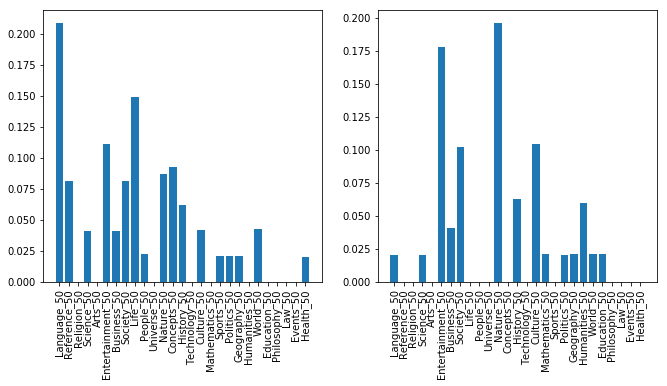

In [61]:
plt.figure(figsize=(11,11))
plt.subplot(221)
plt.bar(range(len(bf_res01)), list(bf_res01.values()), align='center')
plt.xticks(range(len(bf_res01)), list(bf_res01.keys()),rotation='vertical')
plt.subplot(222)
plt.bar(range(len(lsi_res01)), list(lsi_res01.values()), align='center')
plt.xticks(range(len(lsi_res01)), list(lsi_res01.keys()),rotation='vertical')
plt.show()